In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/data.zip.zip'      # ✅ Adjust this if your file name is different
extract_to = '/content/data'                      # ✅ Folder to extract to

# Create the folder if it doesn't exist
os.makedirs(extract_to, exist_ok=True)

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ Dataset unzipped successfully.")


✅ Dataset unzipped successfully.


In [3]:
for root, dirs, files in os.walk('/content/dataset'):
    print(root)


In [4]:
train_dir = '/content/data/train'
val_dir = '/content/data/validation'


In [5]:
# ✅ Step 3: Image Preprocessing
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 128, 128
batch_size = 64

train_dir = '/content/data/train'
val_dir = '/content/data/validation'


train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(img_height, img_width),
                                               batch_size=batch_size,
                                               class_mode='binary')

val_data = val_datagen.flow_from_directory(val_dir,
                                           target_size=(img_height, img_width),
                                           batch_size=batch_size,
                                           class_mode='binary')

Found 93853 images belonging to 2 classes.
Found 30794 images belonging to 2 classes.


In [6]:

# ✅ Step 4: Build CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# ✅ Step 5: Train the Model
epochs = 10
history = model.fit(train_data,
                    validation_data=val_data,
                    epochs=epochs)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 586s 395ms/step - accuracy: 0.7826 - loss: 0.4881 - val_accuracy: 0.7606 - val_loss: 0.4875
Epoch 2/10
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 491s 335ms/step - accuracy: 0.8447 - loss: 0.3591 - val_accuracy: 0.7804 - val_loss: 0.4607
Epoch 3/10
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 483s 329ms/step - accuracy: 0.8795 - loss: 0.2920 - val_accuracy: 0.7976 - val_loss: 0.4280
Epoch 4/10
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 483s 330ms/step - accuracy: 0.8990 - loss: 0.2435 - val_accuracy: 0.8168 - val_loss: 0.3908
Epoch 5/10
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 482s 329ms/step - accuracy: 0.9149 - loss: 0.2102 - val_accuracy: 0.8660 - val_loss: 0.3218
Epoch 6/10
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 482s 329ms/step - accuracy: 0.9270 - loss: 0.1828 - val_accuracy: 0.8482 - val_loss: 0.3924
Epoch 7/10
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 500s 328ms/step - accuracy: 0.9346 - loss: 0.1648 - val_accuracy: 0.8610 - val_loss: 0.3469
Epoch 8/10
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 484s 330ms/step - ac

In [8]:
 # ✅ Step 7: Evaluate Final Validation Accuracy
val_loss, val_acc = model.evaluate(val_data)
print(f"🎯 Final Validation Accuracy: {val_acc * 100:.2f}%")


482/482 ━━━━━━━━━━━━━━━━━━━━ 40s 82ms/step - accuracy: 0.8849 - loss: 0.3114
🎯 Final Validation Accuracy: 88.25%


In [ ]:
# ✅ Step 6: Save the Model
model.save('/content/fake_image_detector.h5')
print("✅ Model saved as fake_image_detector.h5")

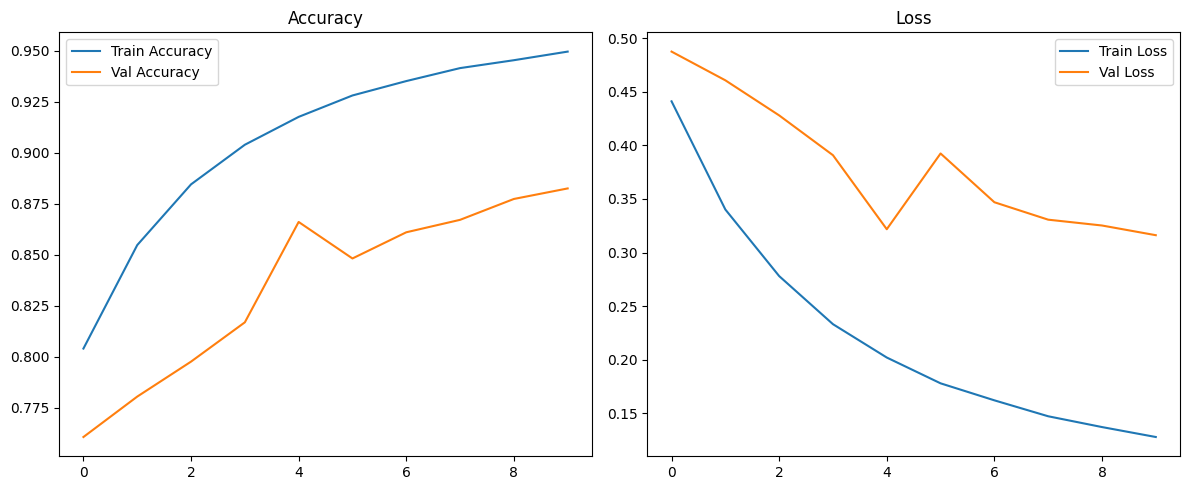

In [10]:

# ✅ Step 7: Plot Accuracy and Loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()